In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [341]:
links = pd.read_parquet("data_clean/links.parquet")
vessels = pd.read_parquet("data_clean/vessels.parquet")
locations = pd.read_parquet("data_clean/locations.parquet")
deliveries = pd.read_parquet("data_clean/deliveries.parquet")
fish = pd.read_parquet("data_clean/fish.parquet")

trans = pd.read_parquet("data_clean/transactions.parquet")
ping = pd.read_parquet("data_clean/pings.parquet")
harbor = pd.read_parquet("data_clean/harbors.parquet")

In [382]:
ping

,source,target,time,dwell,week,company,flag_country,length_overall,tonnage,Activities,fish_species_present,kind
0,City of Haacklee,perchplundererbc0,2035-09-16 04:06:48.185987,115074.790577,37,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
1,City of Haacklee,perchplundererbc0,2035-09-20 05:21:33.678120,412706.321880,38,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
2,City of Haacklee,perchplundererbc0,2035-09-28 04:31:47.118191,286092.881809,39,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
3,City of Haacklee,perchplundererbc0,2035-10-04 04:59:36.052683,327623.947317,40,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
4,City of Haacklee,perchplundererbc0,2035-10-15 04:26:14.647650,243225.352350,42,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
...,...,...,...,...,...,...,...,...,...,...,...,...
218472,Tuna Shelf,maritimemajesticeb7,2035-11-09 16:10:38.373929,3443.278261,45,Unknown,Merigrad,90.0,3800.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground
218473,Tuna Shelf,vesselvanguardbf2,2035-07-31 13:26:04.610993,7236.802726,31,Unknown,Orvietola,90.0,2100.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground
218474,Tuna Shelf,vesselvanguardbf2,2035-09-20 23:27:08.743682,6776.912594,38,Unknown,Orvietola,90.0,2100.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground
218475,Tuna Shelf,seawaysavvy102,2035-08-24 11:43:28.130654,7722.914478,34,Unknown,Uzifrica,190.0,36800.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground


In [381]:
vessels[vessels["company"]=="SouthSeafood Express Corp"]

,vessel_id,company,flag_country,length_overall,tonnage
67,snappersnatcher7be,SouthSeafood Express Corp,Oceanus,20.0,100.0
202,roachrobberdb6,SouthSeafood Express Corp,Oceanus,130.0,11700.0


In [284]:
# TODO: transform fish species present into list of categories
locations["fish_species_list"] = (
    locations["fish_species_present"]
    .fillna("")
    .str.replace(r"\s+", "", regex=True)        
    .str.split(",")                             
)


In [285]:
sea_area = locations.loc[locations["kind"].isin(["Fishing Ground", "Ecological Preserve"])]
sea_area

,location_id,Activities,fish_species_present,kind,fish_species_list
18,Cod Table,Commercial fishing,"Cod/Gadus n.specificatae, Birdseye/Pisces frig...",Fishing Ground,"[Cod/Gadusn.specificatae, Birdseye/Piscesfrigu..."
19,Ghoti Preserve,"Research, Tourism, Recreation","Wrasse/Labridae n.refert, Beauvoir/Habeas pisc...",Ecological Preserve,"[Wrasse/Labridaen.refert, Beauvoir/Habeaspisce..."
20,Wrasse Beds,Commercial fishing,"Wrasse/Labridae n.refert, Birdseye/Pisces frig...",Fishing Ground,"[Wrasse/Labridaen.refert, Birdseye/Piscesfrigu..."
21,Nemo Reef,"Recreation, Tourism","Wrasse/Labridae n.refert, Tuna/Thunnini n.vera...",Ecological Preserve,"[Wrasse/Labridaen.refert, Tuna/Thunninin.vera,..."
22,Don Limpet Preserve,"Recreation, Tourism","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Ecological Preserve,"[Tuna/Thunninin.vera, Birdseye/Piscesfrigus, B..."
23,Tuna Shelf,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground,"[Tuna/Thunninin.vera, Birdseye/Piscesfrigus, B..."


In [286]:
cities = locations.loc[locations["kind"].isin(["city"])]
cities

,location_id,Activities,fish_species_present,kind,fish_species_list
0,City of Haacklee,"Tourism, Local shipping",Unknown,city,[Unknown]
1,City of Lomark,"Deep sea fishing, Commercial fishing, Tourism,...",Unknown,city,[Unknown]
2,City of Himark,"Recreation, tourism",Unknown,city,[Unknown]
3,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,[Unknown]
4,City of South Paackland,"Industry, Fishing industry, Local shipping",Unknown,city,[Unknown]
5,City of Port Grove,"Tourism, Research",Unknown,city,[Unknown]


In [287]:
import re

fish_clean = fish.copy()
sea_clean = sea_area.copy()

#  Normalizza i nomi dei pesci
def normalize_name(x):
    if pd.isna(x):
        return ''
    x = x.lower()
    x = re.sub(r'[^a-z/]', '', x)   # rimuove tutto tranne lettere e '/'
    return x.strip()

fish_clean['fish_norm'] = fish_clean['entity_name'].apply(normalize_name)

# Esplodi fish_species_list se è lista, altrimenti converti in lista
if isinstance(sea_clean['fish_species_list'].iloc[0], list):
    sea_exp = sea_clean.explode('fish_species_list')
else:
    sea_exp = sea_clean.assign(fish_species_list=sea_clean['fish_species_list'].str.split(',')).explode('fish_species_list')

sea_exp['fish_species_list'] = sea_exp['fish_species_list'].astype(str).str.strip()
sea_exp['fish_norm'] = sea_exp['fish_species_list'].apply(normalize_name)

# Merge sulle versioni normalizzate
fish_locations = fish_clean.merge(
    sea_exp,
    on='fish_norm',
    how='inner'
)[['entity_name', 'location_id', 'kind']].drop_duplicates()

print(fish_locations)


                 entity_name          location_id                 kind
0   Cod/Gadus n.specificatae            Cod Table       Fishing Ground
1     Birdseye/Pisces frigus            Cod Table       Fishing Ground
2     Birdseye/Pisces frigus          Wrasse Beds       Fishing Ground
3     Birdseye/Pisces frigus            Nemo Reef  Ecological Preserve
4     Birdseye/Pisces frigus  Don Limpet Preserve  Ecological Preserve
5     Birdseye/Pisces frigus           Tuna Shelf       Fishing Ground
6    Sockfish/Pisces foetida  Don Limpet Preserve  Ecological Preserve
7   Wrasse/Labridae n.refert       Ghoti Preserve  Ecological Preserve
8   Wrasse/Labridae n.refert          Wrasse Beds       Fishing Ground
9   Wrasse/Labridae n.refert            Nemo Reef  Ecological Preserve
10    Beauvoir/Habeas pisces            Cod Table       Fishing Ground
11    Beauvoir/Habeas pisces       Ghoti Preserve  Ecological Preserve
12    Beauvoir/Habeas pisces          Wrasse Beds       Fishing Ground
13    

In [288]:
# PER CAPIRE QUALI PESCI NON POSSONO ESSERE PESCATI

links = (
    fish_locations.assign(
        location_label=lambda df: df['location_id'].astype(str) + " (" + df['kind'] + ")"
    )
    .groupby(['entity_name', 'location_label'])
    .size()
    .reset_index(name='value')
)

nodes = pd.Index(pd.concat([links['entity_name'], links['location_label']]).unique())

links['source_id'] = nodes.get_indexer(links['entity_name'])
links['target_id'] = nodes.get_indexer(links['location_label'])

fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        label=nodes.tolist(),
        pad=20,
        thickness=18,
        line=dict(color="black", width=0.5)
    ),
    link=dict(
        source=links['source_id'],
        target=links['target_id'],
        value=links['value']
    )
)])

fig.update_layout(
    title_text="Fish → Location",
    font_size=10,
    height=600
)

fig.show()


In [289]:
# --- 1️⃣ Seleziona il porto/città di destinazione ---
available_cities = cities['location_id'].unique()
print("Porti/Città disponibili:", available_cities)

Porti/Città disponibili: ['City of Haacklee' 'City of Lomark' 'City of Himark' 'City of Paackland'
 'City of South Paackland' 'City of Port Grove']


In [374]:
fish

,id,entity_name
0,gadusnspecificatae4ba,Cod/Gadus n.specificatae
1,piscesfrigus900,Birdseye/Pisces frigus
2,piscesfoetidaae7,Sockfish/Pisces foetida
3,labridaenrefert9be,Wrasse/Labridae n.refert
4,habeaspisces4eb,Beauvoir/Habeas pisces
5,piscissapidum9b7,Harland/Piscis sapidum
6,thunnininveradb7,Tuna/Thunnini n.vera
7,piscisosseusb6d,Offidiaa/Piscis osseus
8,oncorhynchusrosea790,Salmon/Oncorhynchus rosea
9,piscessatisb87,Helenaa/Pisces satis


In [373]:
illegal_fishes = ["Sockfish/Pisces foetida", "Offidiaa/Piscis osseus", "Helenaa/Pisces satis"]
fish_illegal = fish[fish["entity_name"].isin(illegal_fishes)]
fish_illegal

,id,entity_name
2,piscesfoetidaae7,Sockfish/Pisces foetida
7,piscisosseusb6d,Offidiaa/Piscis osseus
9,piscessatisb87,Helenaa/Pisces satis


In [376]:
trans[trans["fish_id"]=="piscesfoetidaae7"]

,source,target_harbor,Activities_harbor,fish_species_harbor,kind_harbor,fish_id,date,qty_tons
226,cargo_2035_2429901f,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,piscesfoetidaae7,2035-11-04,3.750
227,cargo_2035_243088f4,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,piscesfoetidaae7,2035-11-02,21.250
228,cargo_2035_24309db6,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,piscesfoetidaae7,2035-08-09,31.875
229,cargo_2035_2431048a,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,piscesfoetidaae7,2035-11-07,23.125
230,cargo_2035_2431298a,City of South Paackland,"Industry, Fishing industry, Local shipping",Unknown,city,piscesfoetidaae7,2035-08-15,23.125
...,...,...,...,...,...,...,...,...
4797,cargo_2035_30929e8b,City of Himark,"Recreation, tourism",Unknown,city,piscesfoetidaae7,2035-10-25,20.250
4808,cargo_2035_3094056e,City of Himark,"Recreation, tourism",Unknown,city,piscesfoetidaae7,2035-10-27,11.250
4819,cargo_2035_30951e9c,City of Himark,"Recreation, tourism",Unknown,city,piscesfoetidaae7,2035-11-01,17.250
4820,cargo_2035_30952cdb,City of Himark,"Recreation, tourism",Unknown,city,piscesfoetidaae7,2035-11-03,5.250


In [292]:
selected_city = "City of Paackland"

# --- 1️⃣ FISH → LOCATION ---
links_fish_loc = (
    fish_locations.groupby(['entity_name', 'location_id'])
    .size()
    .reset_index(name='value')
    .rename(columns={'entity_name': 'Fish', 'location_id': 'Location'})
)

# --- 2️⃣ LOCATION → VESSEL ---
links_loc_vessel = (
    ping[['source', 'target']]
    .dropna()
    .rename(columns={'source': 'Location', 'target': 'Vessel'})
    .groupby(['Location', 'Vessel'])
    .size()
    .reset_index(name='value')
)
links_loc_vessel = links_loc_vessel[
    links_loc_vessel['Location'].isin(fish_locations['location_id'].unique())
]

# --- 3️⃣ VESSEL → CITY ---
vessel_city = ping[ping['source'].isin(cities['location_id'])].copy()
links_vessel_city = (
    vessel_city[['source', 'target']]
    .dropna()
    .rename(columns={'source': 'City', 'target': 'Vessel'})
    .groupby(['Vessel', 'City'])
    .size()
    .reset_index(name='value')
)

# --- 4️⃣ FISH → CITY (dalla tabella trans) ---
links_fish_city = (
    trans[['target_harbor', 'fish_id']]
    .dropna()
    .rename(columns={'target_harbor': 'City', 'fish_id': 'Fish'})
    .groupby(['Fish', 'City'])
    .size()
    .reset_index(name='value')
)

# --- 🔒 FILTRO: considera solo i flussi che arrivano alla city scelta ---
vessels_to_city = set(links_vessel_city.loc[links_vessel_city['City'] == selected_city, 'Vessel'])
fish_to_city = set(links_fish_city.loc[links_fish_city['City'] == selected_city, 'Fish'])

# Filtra Location → Vessel (solo se il vessel arriva alla city)
links_loc_vessel_f = links_loc_vessel[links_loc_vessel['Vessel'].isin(vessels_to_city)]
locations_kept = set(links_loc_vessel_f['Location'])

# Filtra Fish → Location (solo per location coinvolte)
links_fish_loc_f = links_fish_loc[links_fish_loc['Location'].isin(locations_kept)]

# Filtra VESSEL → CITY
links_vessel_city_f = links_vessel_city[links_vessel_city['City'] == selected_city]

# Filtra FISH → CITY
links_fish_city_f = links_fish_city[links_fish_city['City'] == selected_city]

# --- 5️⃣ Combina tutti i livelli ---
links_all_filtered = pd.concat([
    links_fish_loc_f.rename(columns={'Fish': 'source_name', 'Location': 'target_name'}),
    links_loc_vessel_f.rename(columns={'Location': 'source_name', 'Vessel': 'target_name'}),
    links_vessel_city_f.rename(columns={'Vessel': 'source_name', 'City': 'target_name'}),
    links_fish_city_f.rename(columns={'Fish': 'source_name', 'City': 'target_name'})  # 🔥 aggiunge collegamento diretto
], ignore_index=True)

# --- 6️⃣ Nodi e mapping ---
nodes = pd.Index(pd.concat([links_all_filtered['source_name'], links_all_filtered['target_name']]).dropna().unique())
links_all_filtered['source_id'] = links_all_filtered['source_name'].apply(nodes.get_loc)
links_all_filtered['target_id'] = links_all_filtered['target_name'].apply(nodes.get_loc)

# --- 7️⃣ Sankey ---
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        label=nodes.tolist(),
        pad=20,
        thickness=18,
        line=dict(color="black", width=0.5)
    ),
    link=dict(
        source=links_all_filtered['source_id'],
        target=links_all_filtered['target_id'],
        value=links_all_filtered['value']
    )
)])

fig.update_layout(
    title_text=f"Fish → Location → Vessel → {selected_city} (+ direct Fish → City)",
    font_size=10,
    height=800
)

fig.show()


In [293]:
selected_city = "City of Paackland"

# --- 1️⃣ FISH → LOCATION ---
links_fish_loc = (
    fish_locations.groupby(['entity_name', 'location_id'])
    .size()
    .reset_index(name='value')
    .rename(columns={'entity_name': 'Fish', 'location_id': 'Location'})
)

# --- 2️⃣ LOCATION → VESSEL ---
links_loc_vessel = (
    ping[['source', 'target']]
    .dropna()
    .rename(columns={'source': 'Location', 'target': 'Vessel'})
    .groupby(['Location', 'Vessel'])
    .size()
    .reset_index(name='value')
)
links_loc_vessel = links_loc_vessel[
    links_loc_vessel['Location'].isin(fish_locations['location_id'].unique())
]

# --- 3️⃣ VESSEL → CITY ---
vessel_city = ping[ping['source'].isin(cities['location_id'])].copy()
links_vessel_city = (
    vessel_city[['source', 'target']]
    .dropna()
    .rename(columns={'source': 'City', 'target': 'Vessel'})
    .groupby(['Vessel', 'City'])
    .size()
    .reset_index(name='value')
)

# --- 4️⃣ CITY → FISH (dal dataset trans) ---
links_city_fish = (
    trans[['target_harbor', 'fish_id']]
    .dropna()
    .rename(columns={'target_harbor': 'City', 'fish_id': 'FishCommodity'})
    .groupby(['City', 'FishCommodity'])
    .size()
    .reset_index(name='value')
)

# --- 🔒 FILTRO: considera solo i flussi legati alla city selezionata ---
vessels_to_city = set(
    links_vessel_city.loc[links_vessel_city['City'] == selected_city, 'Vessel']
)
links_loc_vessel_f = links_loc_vessel[links_loc_vessel['Vessel'].isin(vessels_to_city)]
locations_kept = set(links_loc_vessel_f['Location'])
links_fish_loc_f = links_fish_loc[links_fish_loc['Location'].isin(locations_kept)]
links_vessel_city_f = links_vessel_city[links_vessel_city['City'] == selected_city]
links_city_fish_f = links_city_fish[links_city_fish['City'] == selected_city]

# --- 5️⃣ Combina tutti i livelli ---
links_all_filtered = pd.concat([
    links_fish_loc_f.rename(columns={'Fish': 'source_name', 'Location': 'target_name'}),
    links_loc_vessel_f.rename(columns={'Location': 'source_name', 'Vessel': 'target_name'}),
    links_vessel_city_f.rename(columns={'Vessel': 'source_name', 'City': 'target_name'}),
    links_city_fish_f.rename(columns={'City': 'source_name', 'FishCommodity': 'target_name'})  # ✅ estensione
], ignore_index=True)

# --- 6️⃣ Crea nodi e mapping ---
nodes = pd.Index(pd.concat(
    [links_all_filtered['source_name'], links_all_filtered['target_name']]
).dropna().unique())

links_all_filtered['source_id'] = links_all_filtered['source_name'].apply(nodes.get_loc)
links_all_filtered['target_id'] = links_all_filtered['target_name'].apply(nodes.get_loc)

# --- 7️⃣ Sankey finale ---
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        label=nodes.tolist(),
        pad=20,
        thickness=18,
        line=dict(color="black", width=0.5)
    ),
    link=dict(
        source=links_all_filtered['source_id'],
        target=links_all_filtered['target_id'],
        value=links_all_filtered['value']
    )
)])

fig.update_layout(
    title_text=f"Fish → Location → Vessel → {selected_city} → Exported Fish",
    font_size=10,
    height=900
)

fig.show()


In [294]:
selected_port = "City of Paackland"
selected_date = pd.Timestamp("2035-11-23")

In [295]:
trans

,source,target_harbor,Activities_harbor,fish_species_harbor,kind_harbor,fish_id,date,qty_tons
0,cargo_2035_2394778c,City of South Paackland,"Industry, Fishing industry, Local shipping",Unknown,city,gadusnspecificatae4ba,2035-11-03,24.375
1,cargo_2035_23956ba0,City of South Paackland,"Industry, Fishing industry, Local shipping",Unknown,city,gadusnspecificatae4ba,2035-08-16,18.125
2,cargo_2035_23957cfd,City of South Paackland,"Industry, Fishing industry, Local shipping",Unknown,city,gadusnspecificatae4ba,2035-08-20,20.625
3,cargo_2035_23958501,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,gadusnspecificatae4ba,2035-11-07,13.125
4,cargo_2035_23959ab6,City of South Paackland,"Industry, Fishing industry, Local shipping",Unknown,city,gadusnspecificatae4ba,2035-08-24,13.125
...,...,...,...,...,...,...,...,...
4987,cargo_2035_31187527,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,habeaspisces4eb,2035-08-21,7.500
4988,cargo_2035_3119010f,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,habeaspisces4eb,2035-08-24,10.000
4989,cargo_2035_3119118e,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,habeaspisces4eb,2035-08-25,15.000
4990,cargo_2035_311936c4,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,habeaspisces4eb,2035-08-30,19.000


In [296]:
trans

,source,target_harbor,Activities_harbor,fish_species_harbor,kind_harbor,fish_id,date,qty_tons
0,cargo_2035_2394778c,City of South Paackland,"Industry, Fishing industry, Local shipping",Unknown,city,gadusnspecificatae4ba,2035-11-03,24.375
1,cargo_2035_23956ba0,City of South Paackland,"Industry, Fishing industry, Local shipping",Unknown,city,gadusnspecificatae4ba,2035-08-16,18.125
2,cargo_2035_23957cfd,City of South Paackland,"Industry, Fishing industry, Local shipping",Unknown,city,gadusnspecificatae4ba,2035-08-20,20.625
3,cargo_2035_23958501,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,gadusnspecificatae4ba,2035-11-07,13.125
4,cargo_2035_23959ab6,City of South Paackland,"Industry, Fishing industry, Local shipping",Unknown,city,gadusnspecificatae4ba,2035-08-24,13.125
...,...,...,...,...,...,...,...,...
4987,cargo_2035_31187527,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,habeaspisces4eb,2035-08-21,7.500
4988,cargo_2035_3119010f,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,habeaspisces4eb,2035-08-24,10.000
4989,cargo_2035_3119118e,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,habeaspisces4eb,2035-08-25,15.000
4990,cargo_2035_311936c4,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,habeaspisces4eb,2035-08-30,19.000


In [297]:
trans

,source,target_harbor,Activities_harbor,fish_species_harbor,kind_harbor,fish_id,date,qty_tons
0,cargo_2035_2394778c,City of South Paackland,"Industry, Fishing industry, Local shipping",Unknown,city,gadusnspecificatae4ba,2035-11-03,24.375
1,cargo_2035_23956ba0,City of South Paackland,"Industry, Fishing industry, Local shipping",Unknown,city,gadusnspecificatae4ba,2035-08-16,18.125
2,cargo_2035_23957cfd,City of South Paackland,"Industry, Fishing industry, Local shipping",Unknown,city,gadusnspecificatae4ba,2035-08-20,20.625
3,cargo_2035_23958501,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,gadusnspecificatae4ba,2035-11-07,13.125
4,cargo_2035_23959ab6,City of South Paackland,"Industry, Fishing industry, Local shipping",Unknown,city,gadusnspecificatae4ba,2035-08-24,13.125
...,...,...,...,...,...,...,...,...
4987,cargo_2035_31187527,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,habeaspisces4eb,2035-08-21,7.500
4988,cargo_2035_3119010f,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,habeaspisces4eb,2035-08-24,10.000
4989,cargo_2035_3119118e,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,habeaspisces4eb,2035-08-25,15.000
4990,cargo_2035_311936c4,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,habeaspisces4eb,2035-08-30,19.000


In [298]:
# Calcolo esportazioni totali per fish_id nel porto e data selezionati
daily_exports = (
    trans[(trans["target_harbor"] == selected_port) &
          (pd.to_datetime(trans["date"]).dt.date == selected_date.date())]
    .groupby("fish_id", as_index=False)["qty_tons"]
    .sum()
    .rename(columns={"qty_tons": "exports_tons"})
)

In [299]:
daily_exports

,fish_id,exports_tons
0,gadusnspecificatae4ba,44.250
1,habeaspisces4eb,48.250
2,labridaenrefert9be,49.250
3,piscisosseusb6d,140.375
4,piscissapidum9b7,46.250


In [80]:
# Le navi arrivate il giorno PRIMA sono quelle che hanno scaricato il pesce
arrival_date = selected_date - pd.Timedelta(days=1)

arrived_vessels = (
    ping[(ping["source"] == selected_port) &
         (ping["time"].dt.date == arrival_date.date())]
    [["target", "time"]]
    .drop_duplicates("target")
)

In [81]:
arrived_vessels

,target,time
9162,wahoowrangler016,2035-11-22 18:16:55.524485
9406,squidsquad7fd,2035-11-22 22:37:46.948070
9762,marlinmaster8ab,2035-11-22 10:09:43.018553
10263,breambanditc85,2035-11-22 06:37:39.830201
10429,neptunesnete8c,2035-11-22 05:37:27.126286
10482,mahimahimaster04f,2035-11-22 06:36:25.138144
11115,soleseeker47a,2035-11-22 00:40:34.637757
11276,baitedbreath538,2035-11-22 02:05:11.835091
11427,speckledtroutsaboteur509,2035-11-22 02:12:00.575186
11519,costasmeraldaac7,2035-11-22 17:39:13.588831


In [82]:
ping

,source,target,time,dwell,week,company,flag_country,length_overall,tonnage,Activities,fish_species_present,kind
0,City of Haacklee,perchplundererbc0,2035-09-16 04:06:48.185987,115074.790577,37,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
1,City of Haacklee,perchplundererbc0,2035-09-20 05:21:33.678120,412706.321880,38,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
2,City of Haacklee,perchplundererbc0,2035-09-28 04:31:47.118191,286092.881809,39,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
3,City of Haacklee,perchplundererbc0,2035-10-04 04:59:36.052683,327623.947317,40,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
4,City of Haacklee,perchplundererbc0,2035-10-15 04:26:14.647650,243225.352350,42,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
...,...,...,...,...,...,...,...,...,...,...,...,...
218472,Tuna Shelf,maritimemajesticeb7,2035-11-09 16:10:38.373929,3443.278261,45,Unknown,Merigrad,90.0,3800.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground
218473,Tuna Shelf,vesselvanguardbf2,2035-07-31 13:26:04.610993,7236.802726,31,Unknown,Orvietola,90.0,2100.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground
218474,Tuna Shelf,vesselvanguardbf2,2035-09-20 23:27:08.743682,6776.912594,38,Unknown,Orvietola,90.0,2100.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground
218475,Tuna Shelf,seawaysavvy102,2035-08-24 11:43:28.130654,7722.914478,34,Unknown,Uzifrica,190.0,36800.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground


In [152]:
ping

,source,target,time,dwell,week,company,flag_country,length_overall,tonnage,Activities,fish_species_present,kind
0,City of Haacklee,perchplundererbc0,2035-09-16 04:06:48.185987,115074.790577,37,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
1,City of Haacklee,perchplundererbc0,2035-09-20 05:21:33.678120,412706.321880,38,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
2,City of Haacklee,perchplundererbc0,2035-09-28 04:31:47.118191,286092.881809,39,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
3,City of Haacklee,perchplundererbc0,2035-10-04 04:59:36.052683,327623.947317,40,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
4,City of Haacklee,perchplundererbc0,2035-10-15 04:26:14.647650,243225.352350,42,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
...,...,...,...,...,...,...,...,...,...,...,...,...
218472,Tuna Shelf,maritimemajesticeb7,2035-11-09 16:10:38.373929,3443.278261,45,Unknown,Merigrad,90.0,3800.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground
218473,Tuna Shelf,vesselvanguardbf2,2035-07-31 13:26:04.610993,7236.802726,31,Unknown,Orvietola,90.0,2100.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground
218474,Tuna Shelf,vesselvanguardbf2,2035-09-20 23:27:08.743682,6776.912594,38,Unknown,Orvietola,90.0,2100.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground
218475,Tuna Shelf,seawaysavvy102,2035-08-24 11:43:28.130654,7722.914478,34,Unknown,Uzifrica,190.0,36800.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground


In [ ]:
def compute_fishing_window_strict(ping):
    """
    Costruisce cicli di pesca tra due 'city' consecutive per ogni nave,
    includendo il porto di arrivo (arrival_port).
    """
    ping = ping.sort_values(["target", "time"])
    records = []

    for vessel, group in ping.groupby("target"):  
        group = group.reset_index(drop=True)

        start_idx = None
        start_time = None

        for i, row in group.iterrows():
            if row["kind"] == "city":
                # chiudi il ciclo precedente
                if start_idx is not None and i > start_idx + 1:
                    trip = group.loc[start_idx + 1 : i - 1]
                    if not trip.empty:
                        dwell_summary = (
                            trip.groupby(["source", "kind"], as_index=False)["dwell"].sum()
                        )
                        dwell_summary = dwell_summary.rename(columns={"source": "location_name"})
                        dwell_summary["vessel_name"] = vessel
                        dwell_summary["arrival_time"] = row["time"]
                        dwell_summary["arrival_port"] = row["source"]  
                        records.append(dwell_summary)

                # apri un nuovo ciclo
                start_idx = i
                start_time = row["time"]

    return pd.concat(records, ignore_index=True)


In [207]:
df_fishing_window = compute_fishing_window_strict(ping)

In [208]:
df_fishing_window[df_fishing_window["vessel_name"]=="browntroutbandite67"]

,location_name,kind,dwell,vessel_name,arrival_time,arrival_port
7901,Cod Table,Fishing Ground,91657.447552,browntroutbandite67,2035-10-05 23:25:10.181513,City of Lomark
7902,Exit East,buoy,12727.202670,browntroutbandite67,2035-10-05 23:25:10.181513,City of Lomark
7903,Nav 1,buoy,18015.769023,browntroutbandite67,2035-10-05 23:25:10.181513,City of Lomark
7904,Nav 2,buoy,17034.446207,browntroutbandite67,2035-10-05 23:25:10.181513,City of Lomark
7905,Nav C,buoy,8598.138316,browntroutbandite67,2035-10-05 23:25:10.181513,City of Lomark
7906,Cod Table,Fishing Ground,91656.098795,browntroutbandite67,2035-10-09 22:16:42.269553,City of Lomark
7907,Exit East,buoy,12650.618453,browntroutbandite67,2035-10-09 22:16:42.269553,City of Lomark
7908,Nav 1,buoy,18401.774342,browntroutbandite67,2035-10-09 22:16:42.269553,City of Lomark
7909,Nav 2,buoy,15028.612525,browntroutbandite67,2035-10-09 22:16:42.269553,City of Lomark
7910,Nav C,buoy,8008.553375,browntroutbandite67,2035-10-09 22:16:42.269553,City of Lomark


In [233]:
dwell_dynamic = compute_fishing_window_strict(ping)


In [237]:
!tree

.
├── EDA.ipynb
├── EDA2.ipynb
├── EDA3.ipynb
├── JSON_prep.ipynb
├── data_clean
│   ├── deliveries.parquet
│   ├── fish.parquet
│   ├── fish_locations.parquet
│   ├── harbors.parquet
│   ├── links.parquet
│   ├── locations.parquet
│   ├── pings.parquet
│   ├── transactions.parquet
│   └── vessels.parquet
├── frontend_data
│   ├── deliveries.json
│   ├── fish.json
│   ├── harbor.json
│   ├── harbors.json
│   ├── locations.json
│   ├── ping.json
│   ├── pings.json
│   ├── trans.json
│   ├── transactions.json
│   ├── vessel_catch_by_habitat.json
│   ├── vessels.json
│   └── vessels_dwell.json
├── requirements.txt
└── sankey_fish.html

3 directories, 27 files


In [238]:
dwell_dynamic.to_parquet("/Users/daviderizzello/Documents/Uni/VisualAnalytics/Progetto/backend/data/dwell_dynamic.parquet")

In [199]:
dwell_dynamic

,target,kind,dwell,vessel_name,arrival_time,arrival_port
0,albacoreangler47d,Fishing Ground,19697.115759,albacoreangler47d,2035-02-05 12:47:49.752201,City of South Paackland
1,albacoreangler47d,buoy,6245.189463,albacoreangler47d,2035-02-05 12:47:49.752201,City of South Paackland
2,albacoreangler47d,Fishing Ground,195430.751147,albacoreangler47d,2035-02-15 05:30:39.978268,City of South Paackland
3,albacoreangler47d,buoy,32225.250263,albacoreangler47d,2035-02-15 05:30:39.978268,City of South Paackland
4,albacoreangler47d,Fishing Ground,162055.932406,albacoreangler47d,2035-02-19 05:28:51.875453,City of South Paackland
...,...,...,...,...,...,...
31474,zanderzealotb23,buoy,27981.942179,zanderzealotb23,2035-11-21 12:06:24.608722,City of Paackland
31475,zanderzealotb23,Fishing Ground,181910.220972,zanderzealotb23,2035-11-25 12:56:26.078997,City of Paackland
31476,zanderzealotb23,buoy,16852.212150,zanderzealotb23,2035-11-25 12:56:26.078997,City of Paackland
31477,zanderzealotb23,Fishing Ground,163748.009792,zanderzealotb23,2035-11-28 12:04:20.648668,City of Paackland


In [300]:
# --- Parametri ---
selected_port = "City of Paackland"
selected_date = pd.Timestamp("2035-11-23")

# 1) Calcolo routine di pesca dinamica (contiene: location_name, kind, dwell, vessel_name, arrival_time, arrival_port)
dwell_dynamic = compute_fishing_window_strict(ping)

# 2) Filtro solo le navi che ARRIVANO il giorno prima nel porto selezionato
arrival_date = selected_date - pd.Timedelta(days=1)
dwell_dynamic["arrival_time"] = pd.to_datetime(dwell_dynamic["arrival_time"])

dwell_dynamic = dwell_dynamic[
    (dwell_dynamic["arrival_time"].dt.date == arrival_date.date()) &
    (dwell_dynamic["arrival_port"] == selected_port)          # <--- filtro per porto di arrivo
].copy()

# 3) Aggiungo stazza (tonnage) della nave
vessel_info = vessels[["vessel_id", "tonnage"]].rename(columns={"vessel_id": "vessel_name"})
dwell_dynamic = dwell_dynamic.merge(
    vessel_info, on="vessel_name", how="left"
)

# 4) Esportazioni del giorno selezionato per il porto selezionato
trans["date"] = pd.to_datetime(trans["date"])
daily_exports = (
    trans[(trans["target_harbor"] == selected_port) &
          (trans["date"].dt.date == selected_date.date())]
    .groupby("fish_id", as_index=False)["qty_tons"]
    .sum()
    .rename(columns={"qty_tons": "exports_tons"})
)

# 5) Enrich con nomi dei pesci
id_to_name = dict(zip(fish["id"], fish["entity_name"]))
daily_exports["fish_name"] = daily_exports["fish_id"].map(id_to_name)

# 6) Pacchetto output
daily_view = {
    "date": selected_date,
    "port": selected_port,
    "exports": daily_exports,        # export del giorno t a selected_port
    "vessels_dwell": dwell_dynamic,  # attività tra due city per le navi arrivate a selected_port il giorno t-1
}

print("\n✅ Daily Harbor View (dynamic window, filtered by arrival_port) ready!")



✅ Daily Harbor View (dynamic window, filtered by arrival_port) ready!


In [342]:
daily_view["exports"]

,fish_id,exports_tons,fish_name
0,gadusnspecificatae4ba,44.250,Cod/Gadus n.specificatae
1,habeaspisces4eb,48.250,Beauvoir/Habeas pisces
2,labridaenrefert9be,49.250,Wrasse/Labridae n.refert
3,piscisosseusb6d,140.375,Offidiaa/Piscis osseus
4,piscissapidum9b7,46.250,Harland/Piscis sapidum


In [343]:
trans_filtered = trans[
    (trans["target_harbor"] == selected_port) &
    (pd.to_datetime(trans["date"]).dt.date == selected_date.date())
]
trans_filtered


,source,target_harbor,Activities_harbor,fish_species_harbor,kind_harbor,fish_id,date,qty_tons
198,cargo_2035_242556a3,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,habeaspisces4eb,2035-11-23,2.750
295,cargo_2035_24395939,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,piscisosseusb6d,2035-11-23,21.875
305,cargo_2035_24419c31,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,habeaspisces4eb,2035-11-23,19.250
364,cargo_2035_245216c6,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,piscisosseusb6d,2035-11-23,91.500
603,cargo_2035_248443c0,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,habeaspisces4eb,2035-11-23,12.750
734,cargo_2035_25050772,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,piscissapidum9b7,2035-11-23,36.250
1148,cargo_2035_25622998,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,gadusnspecificatae4ba,2035-11-23,40.500
1226,cargo_2035_25743efc,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,piscisosseusb6d,2035-11-23,22.000
2030,cargo_2035_26980d34,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,gadusnspecificatae4ba,2035-11-23,3.750
2160,cargo_2035_2716044e,City of Paackland,"Industry, Fishing industry, Local shipping, To...",Unknown,city,piscissapidum9b7,2035-11-23,4.000


In [ ]:
exports_with_cargo = (
    daily_view["exports"]
    .merge(
        trans_filtered[["source", "fish_id", "target_harbor", "date"]],
        on="fish_id",
        how="left"
    )
    .rename(columns={"source": "cargo_id"})
)
exports_with_cargo


,fish_id,exports_tons,fish_name,cargo_id,target_harbor,date
0,gadusnspecificatae4ba,44.250,Cod/Gadus n.specificatae,cargo_2035_25622998,City of Paackland,2035-11-23
1,gadusnspecificatae4ba,44.250,Cod/Gadus n.specificatae,cargo_2035_26980d34,City of Paackland,2035-11-23
2,habeaspisces4eb,48.250,Beauvoir/Habeas pisces,cargo_2035_242556a3,City of Paackland,2035-11-23
3,habeaspisces4eb,48.250,Beauvoir/Habeas pisces,cargo_2035_24419c31,City of Paackland,2035-11-23
4,habeaspisces4eb,48.250,Beauvoir/Habeas pisces,cargo_2035_248443c0,City of Paackland,2035-11-23
5,habeaspisces4eb,48.250,Beauvoir/Habeas pisces,cargo_2035_2984278d,City of Paackland,2035-11-23
6,labridaenrefert9be,49.250,Wrasse/Labridae n.refert,cargo_2035_27414728,City of Paackland,2035-11-23
7,labridaenrefert9be,49.250,Wrasse/Labridae n.refert,cargo_2035_28928667,City of Paackland,2035-11-23
8,piscisosseusb6d,140.375,Offidiaa/Piscis osseus,cargo_2035_24395939,City of Paackland,2035-11-23
9,piscisosseusb6d,140.375,Offidiaa/Piscis osseus,cargo_2035_245216c6,City of Paackland,2035-11-23


In [309]:
exports_with_cargo

,fish_id,exports_tons,fish_name,cargo_id,target_harbor,date
0,gadusnspecificatae4ba,44.25,Cod/Gadus n.specificatae,cargo_2035_2394778c,City of South Paackland,2035-11-03
1,gadusnspecificatae4ba,44.25,Cod/Gadus n.specificatae,cargo_2035_23956ba0,City of South Paackland,2035-08-16
2,gadusnspecificatae4ba,44.25,Cod/Gadus n.specificatae,cargo_2035_23957cfd,City of South Paackland,2035-08-20
3,gadusnspecificatae4ba,44.25,Cod/Gadus n.specificatae,cargo_2035_23958501,City of Paackland,2035-11-07
4,gadusnspecificatae4ba,44.25,Cod/Gadus n.specificatae,cargo_2035_23959ab6,City of South Paackland,2035-08-24
...,...,...,...,...,...,...
3724,piscissapidum9b7,46.25,Harland/Piscis sapidum,cargo_2035_3113505b,City of Haacklee,2035-05-19
3725,piscissapidum9b7,46.25,Harland/Piscis sapidum,cargo_2035_311367b9,City of South Paackland,2035-05-23
3726,piscissapidum9b7,46.25,Harland/Piscis sapidum,cargo_2035_31138b98,City of Haacklee,2035-05-23
3727,piscissapidum9b7,46.25,Harland/Piscis sapidum,cargo_2035_3113943e,City of Haacklee,2035-05-26


In [319]:
def estimate_vessel_catch_by_habitat(daily_exports, dwell_dynamic, fish_locations):
    """
    Associa le esportazioni giornaliere alle navi candidate in base alle aree di pesca (habitat),
    pesando per tonnage × dwell solo nelle location associate al pesce.
    """
    results = []

    if daily_exports.empty or dwell_dynamic.empty:
        return pd.DataFrame(columns=[
            "vessel_name", "fish_name", "location_name", "dwell", "tonnage", "estimated_tons"
        ])

    # Crea una mappa fish → lista di location dove vive
    fish_to_locations = (
        fish_locations.groupby("entity_name")["location_id"]
        .apply(list)
        .to_dict()
    )

    for _, row in daily_exports.iterrows():
        fish_name = row["fish_name"]
        exports_tons = row["exports_tons"]

        habitats = fish_to_locations.get(fish_name, [])
        if not habitats:
            continue

        # Filtra solo dwell in location compatibili
        candidates = dwell_dynamic[dwell_dynamic["location_name"].isin(habitats)].copy()
        if candidates.empty:
            continue

        candidates["weight"] = candidates["tonnage"] * candidates["dwell"]
        total_weight = candidates["weight"].sum()
        candidates["cargo_id"] = row["cargo_id"]
        if total_weight == 0:
            continue

        candidates["estimated_tons"] = exports_tons * (candidates["weight"] / total_weight)
        candidates["fish_name"] = fish_name

        results.append(
            candidates[["vessel_name", "fish_name", "location_name", "dwell", "tonnage", "estimated_tons", "cargo_id"]]
        )

    if results:
        return pd.concat(results, ignore_index=True)
    else:
        return pd.DataFrame(columns=[
            "vessel_name", "fish_name", "location_name", "dwell", "tonnage", "estimated_tons"
        ])


In [313]:
dwell_dynamic = dwell_dynamic[
    (dwell_dynamic["arrival_time"].dt.date == arrival_date.date()) &
    (dwell_dynamic["arrival_port"] == selected_port)          # <--- filtro per porto di arrivo
].copy()


In [352]:
# --- SETUP PARAMETRI ---
selected_port = "City of Paackland"
selected_date = pd.Timestamp("2035-11-23")

# 1️⃣ Calcolo routine di pesca dinamica (dwell, arrival_time, arrival_port)
dwell_dynamic = compute_fishing_window_strict(ping)

# Filtra solo le navi che ARRIVANO il giorno prima nel porto selezionato
arrival_date = selected_date - pd.Timedelta(days=1)
dwell_dynamic["arrival_time"] = pd.to_datetime(dwell_dynamic["arrival_time"])

dwell_dynamic = dwell_dynamic[
    (dwell_dynamic["arrival_time"].dt.date == arrival_date.date()) &
    (dwell_dynamic["arrival_port"] == selected_port)
].copy()

# 2️⃣ Aggiungo la stazza (tonnage)
vessel_info = vessels[["vessel_id", "tonnage"]].rename(columns={"vessel_id": "vessel_name"})
dwell_dynamic = dwell_dynamic.merge(vessel_info, on="vessel_name", how="left")

# 3️⃣ Esportazioni del giorno selezionato con dettaglio cargo
trans["date"] = pd.to_datetime(trans["date"])
daily_exports = (
    trans[(trans["target_harbor"] == selected_port) &
          (trans["date"].dt.date == selected_date.date())]
    .rename(columns={"source": "cargo_id", "qty_tons": "exports_tons"})
    [["cargo_id", "fish_id", "exports_tons", "target_harbor", "date"]]
)

# 4️⃣ Enrich con nomi dei pesci
id_to_name = dict(zip(fish["id"], fish["entity_name"]))
daily_exports["fish_name"] = daily_exports["fish_id"].map(id_to_name)

# 5️⃣ Pacchetto output
daily_view = {
    "date": selected_date,
    "port": selected_port,
    "exports": daily_exports,
    "vessels_dwell": dwell_dynamic,
}

print("\n✅ Daily Harbor View (dynamic window, with cargo detail) ready!")

# ==========================================================
# 🔁 FUNZIONE ESTESA: CARGO → FISH → VESSEL
# ==========================================================
def estimate_vessel_catch_by_habitat_with_cargo(daily_exports, dwell_dynamic, fish_locations):
    """
    Associa ogni cargo_id alle navi candidate in base alle aree di pesca (habitat),
    pesando per tonnage × dwell solo nelle location associate al pesce.
    Restituisce una tabella cargo → fish → vessel con stime di tons.
    """
    results = []

    if daily_exports.empty or dwell_dynamic.empty:
        return pd.DataFrame(columns=[
            "cargo_id", "vessel_name", "fish_name", "location_name",
            "dwell", "tonnage", "estimated_tons"
        ])

    # Mappa fish → lista di location habitat
    fish_to_locations = (
        fish_locations.groupby("entity_name")["location_id"]
        .apply(list)
        .to_dict()
    )

    # Itera su ogni cargo
    for _, row in daily_exports.iterrows():
        fish_name = row["fish_name"]
        exports_tons = row["exports_tons"]
        cargo_id = row["cargo_id"]

        habitats = fish_to_locations.get(fish_name, [])
        if not habitats:
            continue

        # Filtra i dwell solo in location compatibili
        candidates = dwell_dynamic[dwell_dynamic["location_name"].isin(habitats)].copy()
        if candidates.empty:
            continue

        # Peso = tonnage × dwell
        candidates["weight"] = candidates["tonnage"] * candidates["dwell"]
        total_weight = candidates["weight"].sum()
        if total_weight == 0:
            continue

        # Distribuzione proporzionale del carico
        candidates["estimated_tons"] = exports_tons * (candidates["weight"] / total_weight)
        candidates["fish_name"] = fish_name
        candidates["cargo_id"] = cargo_id

        results.append(
            candidates[["cargo_id", "vessel_name", "fish_name", "location_name",
                        "dwell", "tonnage", "estimated_tons"]]
        )

    if results:
        return pd.concat(results, ignore_index=True)
    else:
        return pd.DataFrame(columns=[
            "cargo_id", "vessel_name", "fish_name", "location_name",
            "dwell", "tonnage", "estimated_tons"
        ])

# 6️⃣ Applica la formula
vessel_catch = estimate_vessel_catch_by_habitat_with_cargo(
    daily_view["exports"],
    daily_view["vessels_dwell"],
    fish_locations
)

print(f"✅ Vessel catch table ready: {len(vessel_catch)} rows")
display(vessel_catch.head(20))



✅ Daily Harbor View (dynamic window, with cargo detail) ready!
✅ Vessel catch table ready: 134 rows


,cargo_id,vessel_name,fish_name,location_name,dwell,tonnage,estimated_tons
0,cargo_2035_242556a3,baitedbreath538,Beauvoir/Habeas pisces,Cod Table,40291.877638,700.0,0.009302
1,cargo_2035_242556a3,bassbaiterb9f,Beauvoir/Habeas pisces,Cod Table,37178.366872,1100.0,0.013487
2,cargo_2035_242556a3,bassbandit0d5,Beauvoir/Habeas pisces,Cod Table,135229.800800,600.0,0.026759
3,cargo_2035_242556a3,blackdrumbanditc5b,Beauvoir/Habeas pisces,Cod Table,61890.977985,11800.0,0.240851
4,cargo_2035_242556a3,breambanditc85,Beauvoir/Habeas pisces,Cod Table,129925.245386,3500.0,0.149969
5,cargo_2035_242556a3,browntroutbandite67,Beauvoir/Habeas pisces,Cod Table,205030.986307,4900.0,0.331326
6,cargo_2035_242556a3,cobiacapturere5e,Beauvoir/Habeas pisces,Cod Table,52938.931190,10500.0,0.183318
7,cargo_2035_242556a3,costasmeraldaac7,Beauvoir/Habeas pisces,Cod Table,7810.522978,600.0,0.001546
8,cargo_2035_242556a3,kingfisher87d,Beauvoir/Habeas pisces,Cod Table,12652.406748,400.0,0.001669
9,cargo_2035_242556a3,kingfisher87d,Beauvoir/Habeas pisces,Nemo Reef,48013.800366,400.0,0.006334


In [361]:
vessel_catch.sort_values("estimated_tons", ascending=False)

,cargo_id,vessel_name,fish_name,location_name,dwell,tonnage,estimated_tons
67,cargo_2035_25050772,marlinmaster8ab,Harland/Piscis sapidum,Tuna Shelf,117106.230657,7800.0,33.668483
107,cargo_2035_28928667,mahimahimaster04f,Wrasse/Labridae n.refert,Wrasse Beds,216517.696683,2600.0,19.952736
108,cargo_2035_28928667,marlinmaster8ab,Wrasse/Labridae n.refert,Nemo Reef,47207.236697,7800.0,13.050853
79,cargo_2035_25622998,neptunesnete8c,Cod/Gadus n.specificatae,Cod Table,133675.035491,11500.0,10.010278
81,cargo_2035_25622998,speckledtroutsaboteur509,Cod/Gadus n.specificatae,Cod Table,124320.044770,9400.0,7.609691
...,...,...,...,...,...,...,...
9,cargo_2035_242556a3,kingfisher87d,Beauvoir/Habeas pisces,Nemo Reef,48013.800366,400.0,0.006334
92,cargo_2035_26980d34,kingfisher87d,Cod/Gadus n.specificatae,Cod Table,12652.406748,400.0,0.003051
91,cargo_2035_26980d34,costasmeraldaac7,Cod/Gadus n.specificatae,Cod Table,7810.522978,600.0,0.002826
8,cargo_2035_242556a3,kingfisher87d,Beauvoir/Habeas pisces,Cod Table,12652.406748,400.0,0.001669


In [362]:
vessel_catch["share_percent"] = (
    vessel_catch.groupby("cargo_id")["estimated_tons"]
    .transform(lambda x: 100 * x / x.sum())
)


In [370]:
import plotly.express as px

fig = px.bar(
    vessel_catch,
    x="vessel_name",
    y="share_percent",
    color="fish_name",
    facet_col="cargo_id",
    title="Estimated Contribution per Vessel (as % of Cargo)",
    text_auto=".1f"
)
fig.update_layout(height=600, showlegend=True)
fig.show()


In [371]:
import plotly.express as px

# 🔧 Imposta il cargo che vuoi analizzare
selected_cargo = "cargo_2035_25050772"

# 🔁 Calcolo percentuali (se non già presenti)
vessel_catch["share_percent"] = (
    vessel_catch.groupby("cargo_id")["estimated_tons"]
    .transform(lambda x: 100 * x / x.sum())
)

# 🎯 Filtra solo il cargo scelto
cargo_view = (
    vessel_catch[vessel_catch["cargo_id"] == selected_cargo]
    .sort_values("share_percent", ascending=True)
)

# 📊 Bar plot orizzontale
fig = px.bar(
    cargo_view,
    x="share_percent",
    y="vessel_name",
    color="fish_name",
    orientation="h",
    text="share_percent",
    title=f"Estimated Vessel Contribution — {selected_cargo}",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(
    texttemplate="%{text:.1f}%",
    textposition="outside",
    hovertemplate="<b>%{y}</b><br>Fish: %{customdata[0]}<br>%{x:.2f}%",
    customdata=cargo_view[["fish_name"]]
)

fig.update_layout(
    height=500,
    xaxis_title="Share of Cargo (%)",
    yaxis_title="Vessel",
    yaxis=dict(categoryorder="total ascending"),
    bargap=0.3,
    showlegend=True,
)

fig.show()


In [316]:
trans[trans["target_harbor"]=="City of Haacklee"]

,source,target_harbor,Activities_harbor,fish_species_harbor,kind_harbor,fish_id,date,qty_tons
81,cargo_2035_2406345e,City of Haacklee,"Tourism, Local shipping",Unknown,city,piscissapidum9b7,2035-11-22,21.750
1319,cargo_2035_25888bfc,City of Haacklee,"Tourism, Local shipping",Unknown,city,piscesfrigus900,2035-11-22,16.250
1833,cargo_2035_26685d6d,City of Haacklee,"Tourism, Local shipping",Unknown,city,piscissapidum9b7,2035-11-22,2.500
2099,cargo_2035_27052574,City of Haacklee,"Tourism, Local shipping",Unknown,city,labridaenrefert9be,2035-11-22,3.500
2182,cargo_2035_2719160a,City of Haacklee,"Tourism, Local shipping",Unknown,city,piscissapidum9b7,2035-11-22,13.875
3163,cargo_2035_28553c7b,City of Haacklee,"Tourism, Local shipping",Unknown,city,piscissapidum9b7,2035-11-22,18.000
3930,cargo_2035_296084b2,City of Haacklee,"Tourism, Local shipping",Unknown,city,habeaspisces4eb,2035-11-22,48.125


In [317]:
daily_view["exports"]

,fish_id,exports_tons,fish_name
0,gadusnspecificatae4ba,44.250,Cod/Gadus n.specificatae
1,habeaspisces4eb,48.250,Beauvoir/Habeas pisces
2,labridaenrefert9be,49.250,Wrasse/Labridae n.refert
3,piscisosseusb6d,140.375,Offidiaa/Piscis osseus
4,piscissapidum9b7,46.250,Harland/Piscis sapidum


In [345]:
vessel_catch = estimate_vessel_catch_by_habitat(
    exports_with_cargo,       # esportazioni del giorno
    daily_view["vessels_dwell"], # dwell calcolato con dynamic window
    fish_locations               # mappa pesce → habitat
)


In [346]:
vessel_catch

,vessel_name,fish_name,location_name,dwell,tonnage,estimated_tons,cargo_id
0,baitedbreath538,Cod/Gadus n.specificatae,Cod Table,40291.877638,700.0,0.200665,cargo_2035_25622998
1,bassbaiterb9f,Cod/Gadus n.specificatae,Cod Table,37178.366872,1100.0,0.290964,cargo_2035_25622998
2,bassbandit0d5,Cod/Gadus n.specificatae,Cod Table,135229.800800,600.0,0.577271,cargo_2035_25622998
3,blackdrumbanditc5b,Cod/Gadus n.specificatae,Cod Table,61890.977985,11800.0,5.195958,cargo_2035_25622998
4,breambanditc85,Cod/Gadus n.specificatae,Cod Table,129925.245386,3500.0,3.235324,cargo_2035_25622998
...,...,...,...,...,...,...,...
129,marlinmaster8ab,Harland/Piscis sapidum,Tuna Shelf,117106.230657,7800.0,42.956340,cargo_2035_25050772
130,kingfisher87d,Harland/Piscis sapidum,Tuna Shelf,175091.921798,400.0,3.293660,cargo_2035_2716044e
131,marlinmaster8ab,Harland/Piscis sapidum,Tuna Shelf,117106.230657,7800.0,42.956340,cargo_2035_2716044e
132,kingfisher87d,Harland/Piscis sapidum,Tuna Shelf,175091.921798,400.0,3.293660,cargo_2035_30474038


In [347]:
vessel_catch = vessel_catch.merge(
    exports_with_cargo[["cargo_id", "fish_name", "exports_tons"]],
    on=["cargo_id", "fish_name"], how="left"
)
vessel_catch["share_%"] = (
    vessel_catch["estimated_tons"] / vessel_catch["exports_tons"] * 100
).round(2)


In [351]:
vessel_catch.sort_values("share_%",ascending=False).head(20)


,vessel_name,fish_name,location_name,dwell,tonnage,estimated_tons,cargo_id,exports_tons,share_%
133,marlinmaster8ab,Harland/Piscis sapidum,Tuna Shelf,117106.230657,7800.0,42.956340,cargo_2035_30474038,46.25,92.88
129,marlinmaster8ab,Harland/Piscis sapidum,Tuna Shelf,117106.230657,7800.0,42.956340,cargo_2035_25050772,46.25,92.88
131,marlinmaster8ab,Harland/Piscis sapidum,Tuna Shelf,117106.230657,7800.0,42.956340,cargo_2035_2716044e,46.25,92.88
121,mahimahimaster04f,Wrasse/Labridae n.refert,Wrasse Beds,216517.696683,2600.0,24.414217,cargo_2035_27414728,49.25,49.57
125,mahimahimaster04f,Wrasse/Labridae n.refert,Wrasse Beds,216517.696683,2600.0,24.414217,cargo_2035_28928667,49.25,49.57
122,marlinmaster8ab,Wrasse/Labridae n.refert,Nemo Reef,47207.236697,7800.0,15.969056,cargo_2035_27414728,49.25,32.42
126,marlinmaster8ab,Wrasse/Labridae n.refert,Nemo Reef,47207.236697,7800.0,15.969056,cargo_2035_28928667,49.25,32.42
27,neptunesnete8c,Cod/Gadus n.specificatae,Cod Table,133675.035491,11500.0,10.937156,cargo_2035_26980d34,44.25,24.72
11,neptunesnete8c,Cod/Gadus n.specificatae,Cod Table,133675.035491,11500.0,10.937156,cargo_2035_25622998,44.25,24.72
29,speckledtroutsaboteur509,Cod/Gadus n.specificatae,Cod Table,124320.044770,9400.0,8.314292,cargo_2035_26980d34,44.25,18.79


In [225]:
missing_species = set(daily_view["exports"]["fish_name"]) - set(vessel_catch["fish_name"])

for fish_name in missing_species:
    fallback = daily_view["exports"].loc[
        daily_view["exports"]["fish_name"] == fish_name, "exports_tons"
    ].sum()
    vessel_catch = pd.concat([
        vessel_catch,
        pd.DataFrame([{
            "vessel_name": "UNASSIGNED",
            "fish_name": fish_name,
            "location_name": None,
            "dwell": 0,
            "tonnage": 0,
            "estimated_tons": fallback
        }])
    ], ignore_index=True)


In [227]:
vessel_catch[vessel_catch["vessel_name"]=="UNASSIGNED"]

,vessel_name,fish_name,location_name,dwell,tonnage,estimated_tons
44,UNASSIGNED,Offidiaa/Piscis osseus,None,0.0,0.0,140.375


In [224]:
print("Totale export dichiarato:", daily_view["exports"]["exports_tons"].sum())
print("Totale export stimato:", vessel_catch["estimated_tons"].sum()+140)


Totale export dichiarato: 328.375
Totale export stimato: 328.0


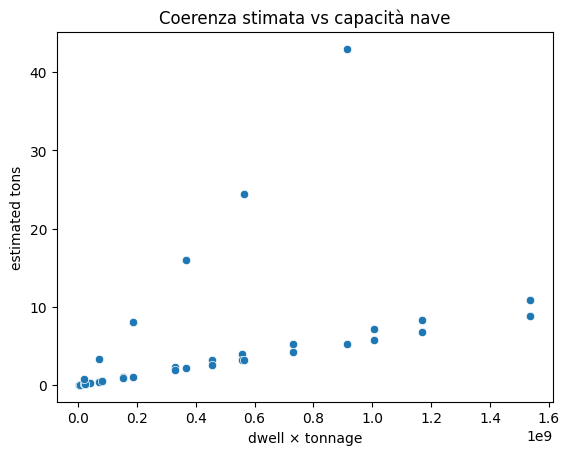

In [ ]:


sns.scatterplot(
    data=vessel_catch,
    x=vessel_catch["dwell"] * vessel_catch["tonnage"],
    y="estimated_tons"
)
plt.xlabel("dwell × tonnage")
plt.ylabel("estimated tons")
plt.title("Coerenza stimata vs capacità nave")
plt.show()


In [218]:
all_fish = set(daily_view["exports"]["fish_name"])
matched_fish = set(vessel_catch["fish_name"])
missing = all_fish - matched_fish
print("Specie senza habitat o senza navi compatibili:", missing)


Specie senza habitat o senza navi compatibili: {'Offidiaa/Piscis osseus'}


In [219]:
print("Navi arrivate a Paackland:", dwell_dynamic["arrival_port"].nunique())
print(dwell_dynamic[["vessel_name", "arrival_port"]].drop_duplicates().head(10))


Navi arrivate a Paackland: 1
             vessel_name       arrival_port
0        baitedbreath538  City of Paackland
3          bassbaiterb9f  City of Paackland
4          bassbandit0d5  City of Paackland
6     blackdrumbanditc5b  City of Paackland
9         breambanditc85  City of Paackland
12   browntroutbandite67  City of Paackland
16      cobiacapturere5e  City of Paackland
19      costasmeraldaac7  City of Paackland
21         kingfisher87d  City of Paackland
25  longfintunalooterf32  City of Paackland


In [221]:
dwell_locs = dwell_dynamic["location_name"].unique()
missing = set(fish_locations.loc[
    fish_locations["entity_name"] == "Offidiaa/Piscis osseus", "location_id"
]) - set(dwell_locs)
print("Habitat di Offidiaa/Piscis osseus non visitati:", missing)


Habitat di Offidiaa/Piscis osseus non visitati: {'Ghoti Preserve'}


In [220]:
fish_locations[fish_locations["entity_name"] == "Offidiaa/Piscis osseus"]


,entity_name,location_id,kind
20,Offidiaa/Piscis osseus,Ghoti Preserve,Ecological Preserve


In [102]:
deliveries[deliveries["date"]==selected_date]["qty_tons"].sum()

np.float64(1154.75)

In [104]:
vessel_catch.sort_values("estimated_tons", ascending=False)

,vessel_name,fish_name,location_name,dwell,tonnage,estimated_tons
140,malta8cc,Offidiaa/Piscis osseus,Ghoti Preserve,297164.167144,200.0,140.375000
146,marlinmaster8ab,Harland/Piscis sapidum,Tuna Shelf,117106.230657,7800.0,18.928413
149,welscatfishwrangler6ae,Harland/Piscis sapidum,Tuna Shelf,51689.288784,10800.0,11.568150
124,marinemarauder8c9,Wrasse/Labridae n.refert,Wrasse Beds,63000.549259,17200.0,9.068903
15,grasspickerelgangster7d1,Cod/Gadus n.specificatae,Cod Table,143536.597566,11800.0,5.535241
...,...,...,...,...,...,...
67,kingfisher87d,Beauvoir/Habeas pisces,Cod Table,12652.406748,400.0,0.011276
14,cutthroattroutcatchere2b,Cod/Gadus n.specificatae,Cod Table,32516.388558,100.0,0.010627
59,costasmeraldaac7,Beauvoir/Habeas pisces,Cod Table,7810.522978,600.0,0.010441
60,cutthroattroutcatchere2b,Beauvoir/Habeas pisces,Cod Table,32516.388558,100.0,0.007244


In [99]:
# Seleziona una singola nave da visualizzare
selected_vessel = "snappersnatcher7be"

df_vessel = ping[ping["target"] == selected_vessel].copy()

# Ordina cronologicamente e crea intervallo start-end per ciascun punto
df_vessel = df_vessel.sort_values("time")
df_vessel["start"] = df_vessel["time"]
df_vessel["end"] = df_vessel["time"] + pd.to_timedelta(df_vessel["dwell"], unit="s")

# Semplifica: tieni solo i campi rilevanti
df_vessel = df_vessel[["source", "kind", "start", "end"]]

# Colori diversi per tipo di area (porto, fishing ground, preserve, buoy)
color_map = {
    "city": "#1f77b4",
    "Fishing Ground": "#2ca02c",
    "Ecological Preserve": "#ff7f0e",
    "buoy": "#9467bd"
}

fig = px.timeline(
    df_vessel,
    x_start="start",
    x_end="end",
    y="source",
    color="kind",
    color_discrete_map=color_map,
    title=f"Fishing Routine – {selected_vessel}",
    labels={"location_name": "Location", "kind": "Type"}
)

# Inverti l’asse Y per avere i porti in alto
fig.update_yaxes(autorange="reversed")

# Miglioramenti estetici
fig.update_layout(
    height=600,
    xaxis_title="Time",
    yaxis_title="Locations Visited",
    legend_title="Location Type",
    template="simple_white"
)

fig.show()


In [98]:
vessels[vessels["company"]=="SouthSeafood Express Corp"]

,vessel_id,company,flag_country,length_overall,tonnage
67,snappersnatcher7be,SouthSeafood Express Corp,Oceanus,20.0,100.0
202,roachrobberdb6,SouthSeafood Express Corp,Oceanus,130.0,11700.0


In [377]:
dwell_dynamic

,location_name,kind,dwell,vessel_name,arrival_time,arrival_port,tonnage
0,Cod Table,Fishing Ground,40291.877638,baitedbreath538,2035-11-22 02:05:11.835091,City of Paackland,700.0
1,Exit East,buoy,11982.509017,baitedbreath538,2035-11-22 02:05:11.835091,City of Paackland,700.0
2,Nav 2,buoy,5384.516278,baitedbreath538,2035-11-22 02:05:11.835091,City of Paackland,700.0
3,Cod Table,Fishing Ground,37178.366872,bassbaiterb9f,2035-11-22 15:31:38.677996,City of Paackland,1100.0
4,Cod Table,Fishing Ground,135229.800800,bassbandit0d5,2035-11-22 03:51:41.297724,City of Paackland,600.0
5,Nav 2,buoy,31429.283902,bassbandit0d5,2035-11-22 03:51:41.297724,City of Paackland,600.0
6,Cod Table,Fishing Ground,61890.977985,blackdrumbanditc5b,2035-11-22 05:34:01.458396,City of Paackland,11800.0
7,Exit East,buoy,6930.148465,blackdrumbanditc5b,2035-11-22 05:34:01.458396,City of Paackland,11800.0
8,Nav 2,buoy,5310.242575,blackdrumbanditc5b,2035-11-22 05:34:01.458396,City of Paackland,11800.0
9,Cod Table,Fishing Ground,129925.245386,breambanditc85,2035-11-22 06:37:39.830201,City of Paackland,3500.0


In [378]:
ping

,source,target,time,dwell,week,company,flag_country,length_overall,tonnage,Activities,fish_species_present,kind
0,City of Haacklee,perchplundererbc0,2035-09-16 04:06:48.185987,115074.790577,37,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
1,City of Haacklee,perchplundererbc0,2035-09-20 05:21:33.678120,412706.321880,38,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
2,City of Haacklee,perchplundererbc0,2035-09-28 04:31:47.118191,286092.881809,39,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
3,City of Haacklee,perchplundererbc0,2035-10-04 04:59:36.052683,327623.947317,40,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
4,City of Haacklee,perchplundererbc0,2035-10-15 04:26:14.647650,243225.352350,42,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
...,...,...,...,...,...,...,...,...,...,...,...,...
218472,Tuna Shelf,maritimemajesticeb7,2035-11-09 16:10:38.373929,3443.278261,45,Unknown,Merigrad,90.0,3800.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground
218473,Tuna Shelf,vesselvanguardbf2,2035-07-31 13:26:04.610993,7236.802726,31,Unknown,Orvietola,90.0,2100.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground
218474,Tuna Shelf,vesselvanguardbf2,2035-09-20 23:27:08.743682,6776.912594,38,Unknown,Orvietola,90.0,2100.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground
218475,Tuna Shelf,seawaysavvy102,2035-08-24 11:43:28.130654,7722.914478,34,Unknown,Uzifrica,190.0,36800.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground


In [229]:
fig = px.scatter(
    vessels_paackland, x="vessel_name", y="location_name", size="dwell",
    color="area_type", facet_row="area_type", height=900
)
# ✅ Layout styling
fig.update_layout(
    xaxis=dict(title="Vessel ID", tickangle=45),
    yaxis=dict(title="Fishing Location", categoryorder="category ascending"),
    template="simple_white",
    legend_title_text="Area Type",
    title_x=0.5
)

# ✅ Optional annotation: highlight max dwell
top = vessels_paackland.loc[vessels_paackland["dwell"].idxmax()]
fig.add_annotation(
    x=top["vessel_name"],
    y=top["location_name"],
    text="dwell time",
    showarrow=True,
    arrowhead=2,
    font=dict(color="red", size=12)
)

fig.show()


In [232]:
import pandas as pd
import plotly.express as px

# Assume you already have dwell_dynamic
# Ensure datetime type
dwell_dynamic["arrival_time"] = pd.to_datetime(dwell_dynamic["arrival_time"])

# ✅ Select vessels arriving at City of Paackland on a specific day
date = "2035-11-22"

# If you have multiple ports, filter them first (in your compute_fishing_window_strict, 
# city is the arrival, so you can match those arriving at Paackland)
vessels_paackland = dwell_dynamic[
    dwell_dynamic["vessel_name"].isin(
        dwell_dynamic.loc[
            dwell_dynamic["arrival_time"].dt.date == pd.to_datetime(date).date(),
            "vessel_name"
        ]
    )
]

# ✅ Classify protected vs non-protected based on "kind"
def classify_kind(k):
    if "Preserve" in k or "Reserve" in k:
        return "Protected"
    elif "Fishing" in k or "Shelf" in k:
        return "Non-protected"
    else:
        return "Transit / Other"

vessels_paackland["area_type"] = vessels_paackland["kind"].apply(classify_kind)


topN = 10
top_locs = (vessels_paackland.groupby('location_name')['dwell']
            .sum().index)
df_plot = vessels_paackland[vessels_paackland['location_name'].isin(top_locs)].copy()

cats = list(top_locs)  # preserve ranking
fig = px.scatter(
    df_plot, x="vessel_name", y="location_name", size="dwell", color="area_type",
    hover_data=["arrival_time","tonnage"],
    title=f"Routes and Dwell Time of Vessels that Arrived at Paackland — {date}"
)
fig.update_layout(
    height=700,
    yaxis=dict(categoryorder='array', categoryarray=cats)
)


In [109]:
dwell_dynamic["arrival_time"] = pd.to_datetime(dwell_dynamic["arrival_time"])
print(dwell_dynamic["arrival_time"].dt.date.unique())


[datetime.date(2035, 11, 22)]


In [118]:
daily_exports["exports_tons"].max()

np.float64(310.25)

In [134]:
ping

,source,target,time,dwell,week,company,flag_country,length_overall,tonnage,Activities,fish_species_present,kind
0,City of Haacklee,perchplundererbc0,2035-09-16 04:06:48.185987,115074.790577,37,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
1,City of Haacklee,perchplundererbc0,2035-09-20 05:21:33.678120,412706.321880,38,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
2,City of Haacklee,perchplundererbc0,2035-09-28 04:31:47.118191,286092.881809,39,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
3,City of Haacklee,perchplundererbc0,2035-10-04 04:59:36.052683,327623.947317,40,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
4,City of Haacklee,perchplundererbc0,2035-10-15 04:26:14.647650,243225.352350,42,"Bennett, Jones and Miller",Oceanus,70.0,600.0,"Tourism, Local shipping",Unknown,city
...,...,...,...,...,...,...,...,...,...,...,...,...
218472,Tuna Shelf,maritimemajesticeb7,2035-11-09 16:10:38.373929,3443.278261,45,Unknown,Merigrad,90.0,3800.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground
218473,Tuna Shelf,vesselvanguardbf2,2035-07-31 13:26:04.610993,7236.802726,31,Unknown,Orvietola,90.0,2100.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground
218474,Tuna Shelf,vesselvanguardbf2,2035-09-20 23:27:08.743682,6776.912594,38,Unknown,Orvietola,90.0,2100.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground
218475,Tuna Shelf,seawaysavvy102,2035-08-24 11:43:28.130654,7722.914478,34,Unknown,Uzifrica,190.0,36800.0,"Commercial fishing, Sport fishing","Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...",Fishing Ground


In [246]:
# ---- COMMODITY EXPORTS (upper graph) ----
daily_exports = (
    trans[trans["target_harbor"] == "City of Haacklee"]
    .groupby(["date", "fish_id"], as_index=False)["qty_tons"]
    .sum()
    .rename(columns={"qty_tons": "exports_tons"})
)

# Pivot so each fish species is a column
exports_pivot = (
    daily_exports.pivot(index="date", columns="fish_id", values="exports_tons")
    .fillna(0)
)

# ---- VESSEL TONNAGE (lower graph) ----
harbor_daily = (
    ping[ping["source"] == selected_port]
    .groupby(pd.Grouper(key="time", freq="D"))["tonnage"]
    .sum()
    .rename("vessel_tonnage")
    .to_frame()
)

# Reindex to same date range
date_range = pd.date_range(
    start=min(exports_pivot.index.min(), harbor_daily.index.min()),
    end=max(exports_pivot.index.max(), harbor_daily.index.max())
)
exports_pivot = exports_pivot.reindex(date_range, fill_value=0)
harbor_daily = harbor_daily.reindex(date_range, fill_value=0)



In [247]:
harbor_shifted = harbor_daily.shift(1)  # tonnage from previous day

# Merge into a comparison dataframe
compare_df = (
    exports_pivot.sum(axis=1)
    .to_frame("exports_tons")
    .join(harbor_shifted.rename(columns={"vessel_tonnage": "prev_day_tonnage"}))
)
compare_df = compare_df.dropna()


In [248]:
compare_df.head(20)

,exports_tons,prev_day_tonnage
2035-02-02,0.00,2100.0
2035-02-03,0.00,151700.0
2035-02-04,0.00,10100.0
2035-02-05,7.00,3600.0
2035-02-06,63.75,43200.0
2035-02-07,0.00,8100.0
2035-02-08,5.75,124200.0
2035-02-09,0.00,23200.0
2035-02-10,0.00,99900.0
2035-02-11,0.00,125200.0


In [249]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=compare_df.index, y=compare_df["exports_tons"],
    name="Exports (t)", line=dict(color="royalblue")
))
fig.add_trace(go.Scatter(
    x=compare_df.index, y=compare_df["prev_day_tonnage"] / 1000,  # scale down
    name="Vessel Tonnage (t−1, in 1k tons)", line=dict(color="orange")
))
fig.update_layout(
    title="Daily Exports vs Previous-Day Vessel Tonnage",
    xaxis_title="Date",
    yaxis_title="Exports (tons)",
    template="simple_white"
)
fig.show()


In [131]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


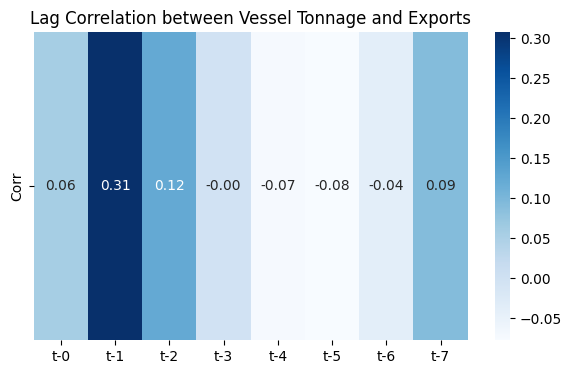

In [ ]:


lags = range(0, 8)  # test up to one week lag
corrs = []
for lag in lags:
    shifted = harbor_daily["vessel_tonnage"].shift(lag)
    merged = compare_df.assign(lag_tonnage=shifted)
    corr = merged["exports_tons"].corr(merged["lag_tonnage"])
    corrs.append(corr)

plt.figure(figsize=(7,4))
sns.heatmap(
    np.array(corrs).reshape(1, -1),
    annot=True, fmt=".2f", cmap="Blues",
    xticklabels=[f"t-{i}" for i in lags],
    yticklabels=["Corr"]
)
plt.title("Lag Correlation between Vessel Tonnage and Exports")
plt.show()


In [144]:
exp_norm = exports_pivot.sum(axis=1) / exports_pivot.sum(axis=1).max()
tonnage_norm = harbor_daily["vessel_tonnage"] / harbor_daily["vessel_tonnage"].max()

fig = go.Figure()
fig.add_trace(go.Bar(x=exp_norm.index, y=exp_norm, name="Exports (normalized)"))
fig.add_trace(go.Bar(x=tonnage_norm.index, y=-tonnage_norm, name="Vessel Tonnage (normalized)", marker_color="grey"))

fig.update_layout(
    title="Normalized Commodities vs Vessels",
    xaxis_title="Date",
    yaxis_title="Normalized Scale (±1)",
    height=700,
    template="simple_white"
)
fig.add_hline(y=0, line_width=2, line_color="black")
fig.show()


,fish_id,exports_tons,fish_name
0,gadusnspecificatae4ba,44.250,Cod/Gadus n.specificatae
1,habeaspisces4eb,48.250,Beauvoir/Habeas pisces
2,labridaenrefert9be,49.250,Wrasse/Labridae n.refert
3,piscisosseusb6d,140.375,Offidiaa/Piscis osseus
4,piscissapidum9b7,46.250,Harland/Piscis sapidum


In [245]:
selected_port="City of Haacklee"
selected_date = pd.Timestamp("2035-02-15")# ---- COMMODITY EXPORTS (upper graph) ----
daily_exports = (
    trans[trans["target_harbor"] == selected_port]
    .groupby(["date", "fish_id"], as_index=False)["qty_tons"]
    .sum()
    .rename(columns={"qty_tons": "exports_tons"})
)

daily_exports[daily_exports["date"]==selected_date]


,date,fish_id,exports_tons
4,2035-02-15,labridaenrefert9be,7.0
